In [1]:
import matplotlib.pyplot as plt
import cv2

from config import config
from license_plate_image_augmentator import LicensePlateImageAugmentator
from pyimagesearch.io import Hdf5DatasetLoader

In [2]:
BATCH_SIZE = 32

In [3]:
loader = Hdf5DatasetLoader()
background_images = loader.load(config.BACKGRND_HDF5, shuffle=True, max_items=10000)
images, labels = loader.load(config.GLP_HDF5, shuffle=True, max_items=BATCH_SIZE)

In [4]:
def show_images(images):
    cols = 4
    rows = len(images) // cols

    image_index = 0
    fig, axarr = plt.subplots(rows, cols, figsize=(15, 15))
    for r in range(rows):
        for c in range(cols):
            image = images[image_index]
            axarr[r, c].axis("off")
            axarr[r, c].title.set_text(labels[image_index])
            axarr[r, c].imshow(image, cmap='gray')
            image_index += 1

    plt.show()

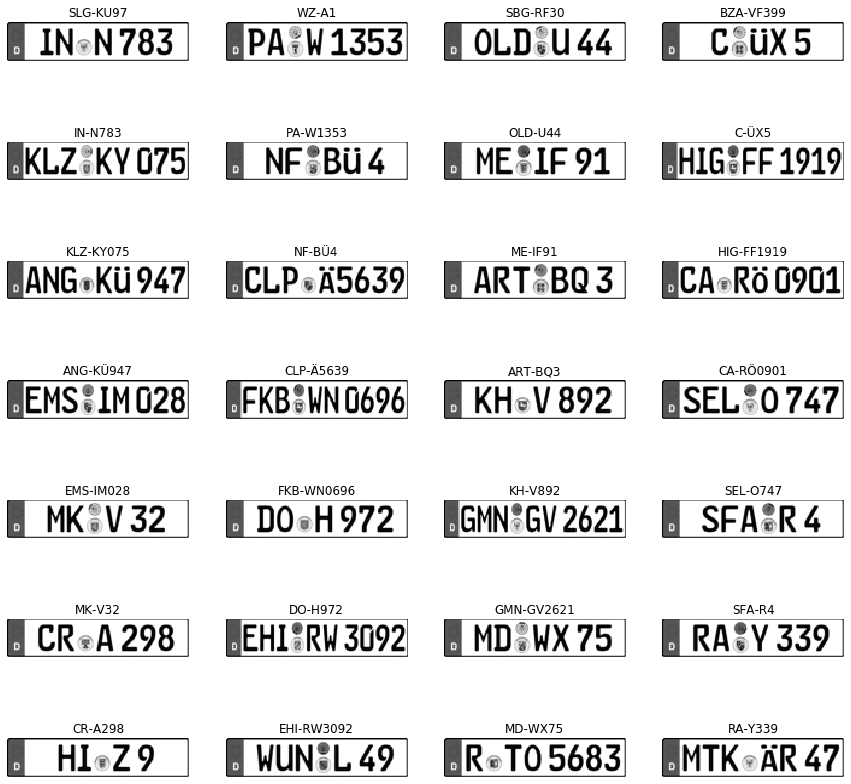

In [5]:
show_images(images[4:])

In [6]:
augmentator = LicensePlateImageAugmentator(config.IMAGE_WIDTH, config.IMAGE_HEIGHT, background_images)

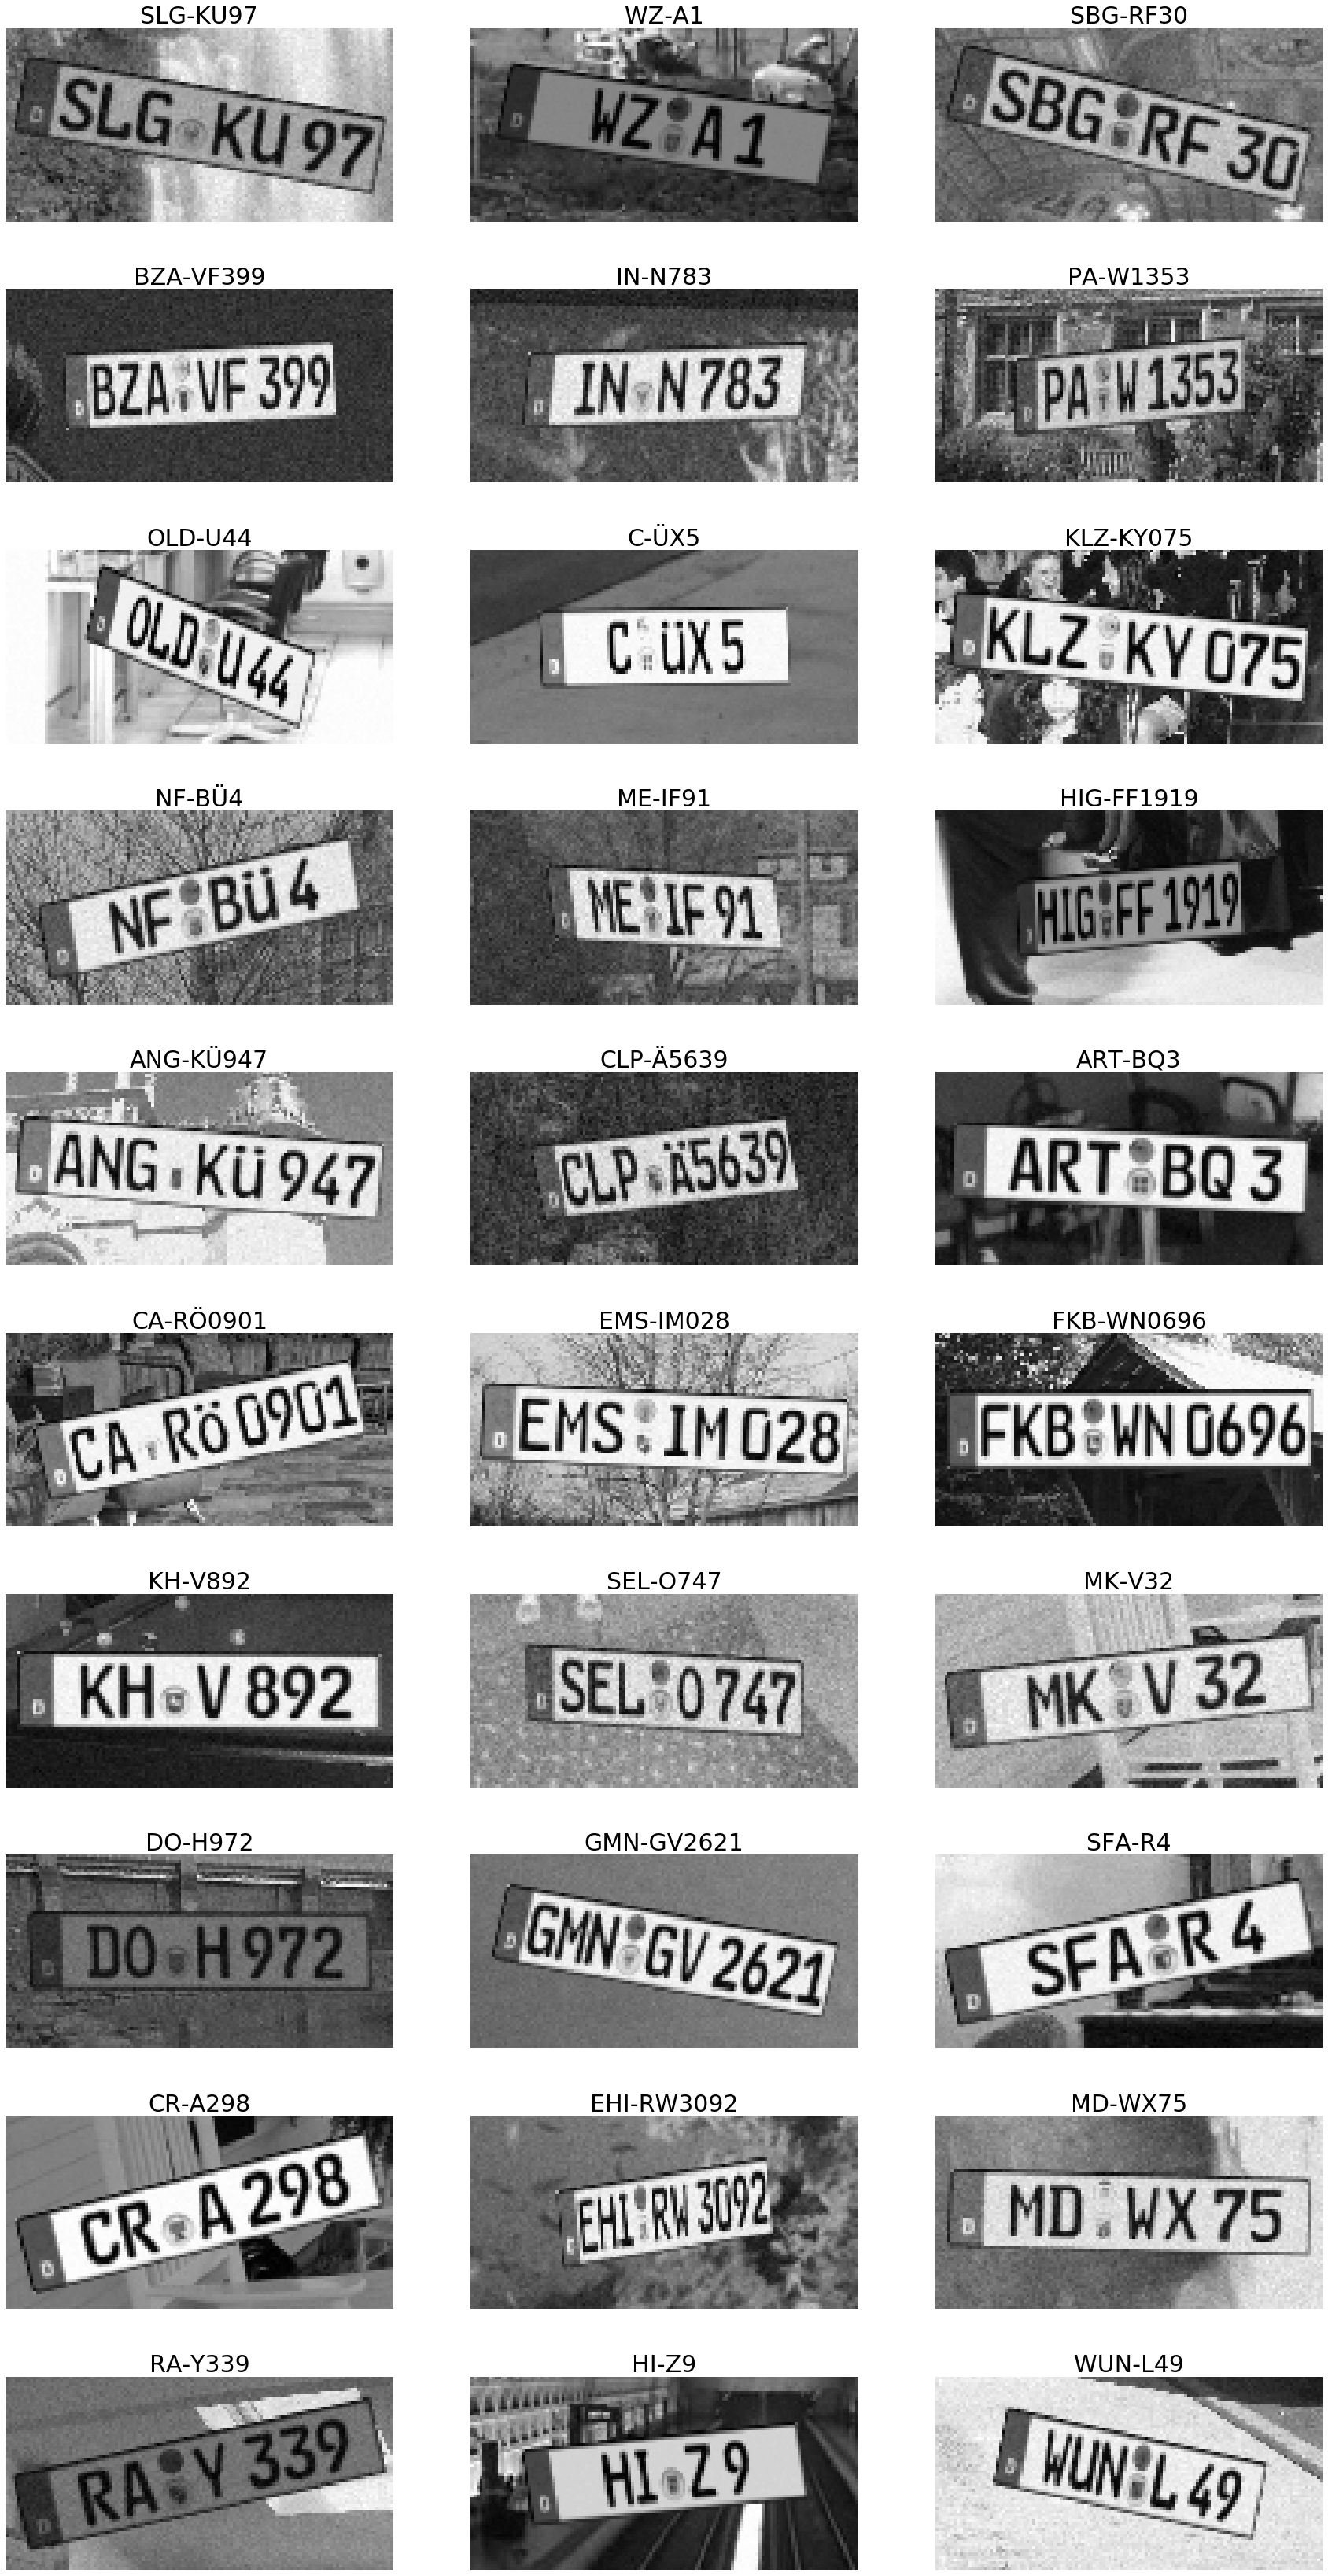

In [17]:
cols = 3
rows = len(images) // cols

image_index = 0
fig, axarr = plt.subplots(rows, cols, figsize=(30, 60))
for r in range(rows):
    for c in range(cols):
        image = images[image_index]
        image = augmentator.generate_plate_image(image)
        axarr[r, c].axis("off")
        axarr[r, c].title.set_size(30)
        axarr[r, c].title.set_text(labels[image_index])
        axarr[r, c].imshow(image, cmap='gray')
        image_index += 1

plt.show()